In [48]:
library(TSA)
library(ggplot2)
options(repr.plot.width = 16, repr.plot.height = 6)

3.5 The data file `wages` contains monthly values of the average hourly wages (in dollars) for workers in the U.S. apparel and textile products industry for July 1981 through June 1987.

a) Display and interpret the time series plot for these data.

b) Use least squares to fit a linear time trend to this time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis.

c) Construct and interpret the time series plot of the standardized residuals from part (b).

d) Use least squares to fit a quadratic time trend to the wages time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis.

e) Construct and interpret the time series plot of the standardized residuals from part (d).

In [44]:
data(wages)
wages

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1981,,,,,,,7.75,7.74,7.87,7.89,7.94,8.00
1982,8.17,8.10,8.13,8.19,8.22,8.25,8.31,8.26,8.33,8.31,8.36,8.42
1983,8.46,8.50,8.47,8.48,8.49,8.49,8.53,8.44,8.52,8.54,8.61,8.67
1984,8.72,8.70,8.73,8.75,8.76,8.77,8.83,8.78,8.85,8.87,8.93,9.00
1985,9.07,9.07,9.09,9.13,9.13,9.13,9.19,9.12,9.16,9.17,9.23,9.31
1986,9.31,9.33,9.33,9.33,9.34,9.32,9.35,9.27,9.31,9.32,9.37,9.42
1987,9.44,9.44,9.44,9.48,9.45,9.44,,,,,,


a) Display and interpret the time series plot for these data.

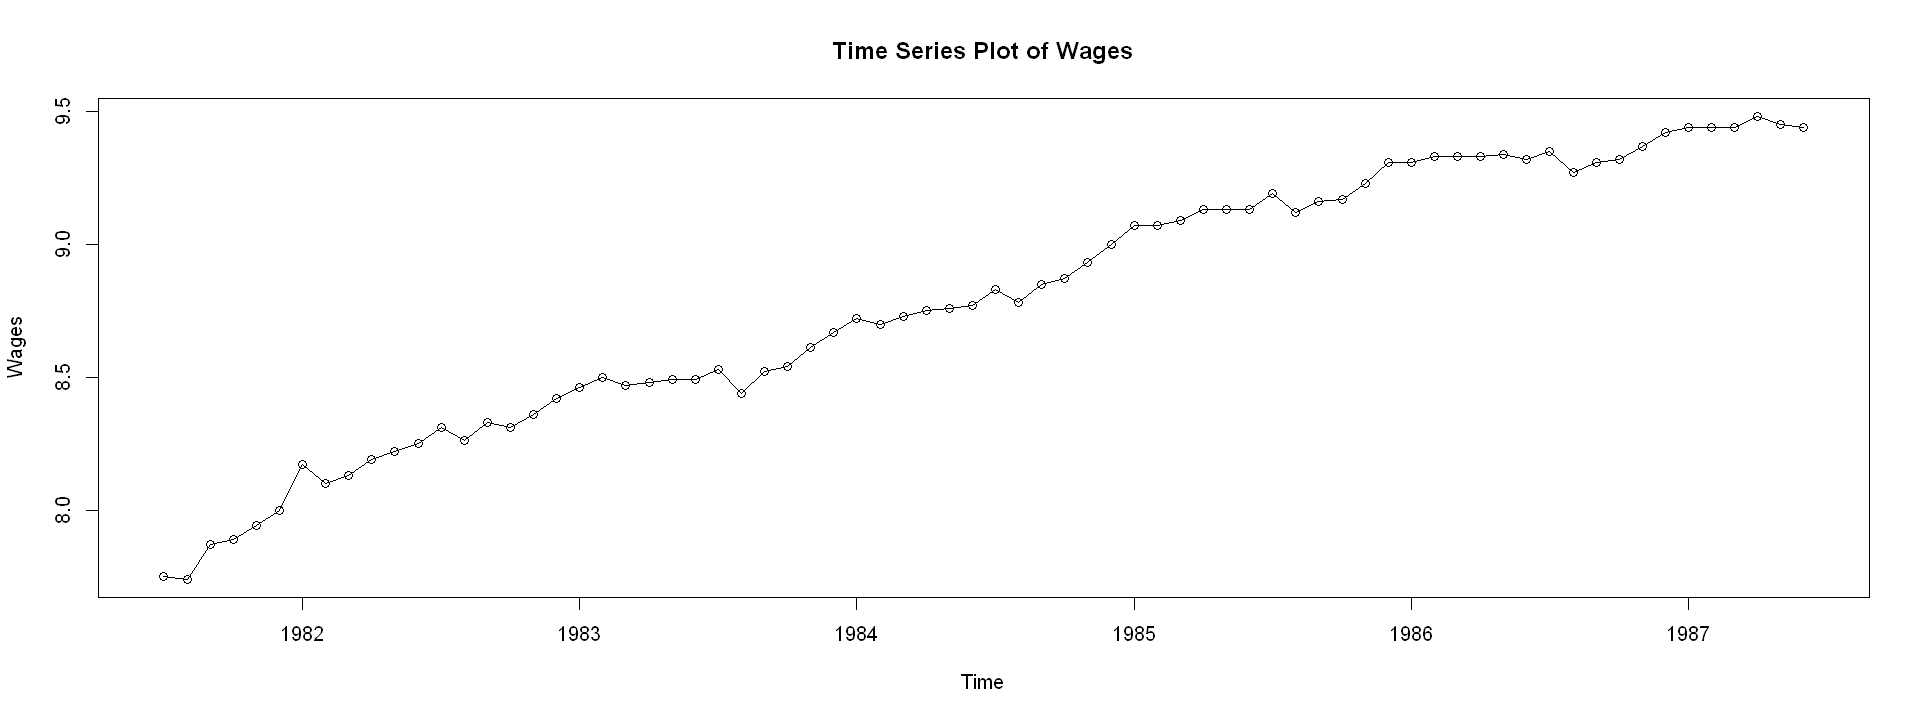

In [117]:
plot(wages, type = "o", ylab = "Wages", main = "Time Series Plot of Wages")

b) Use least squares to fit a linear time trend to this time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis.

In [69]:
# Define the time variable
time_var_wages <- time(wages)

# Fit the linear time trend model
linear_model_wages <- lm(wages ~ time_var_wages)

# Display the summary of the model
summary(linear_model_wages)

# Save the standardized residuals
linear_residuals_wages <- rstandard(linear_model_wages)


Call:
lm(formula = wages ~ time_var_wages)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23828 -0.04981  0.01942  0.05845  0.13136 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.490e+02  1.115e+01  -49.24   <2e-16 ***
time_var_wages  2.811e-01  5.618e-03   50.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08257 on 70 degrees of freedom
Multiple R-squared:  0.9728,	Adjusted R-squared:  0.9724 
F-statistic:  2503 on 1 and 70 DF,  p-value: < 2.2e-16


c) Construct and interpret the time series plot of the standardized residuals from part (b).

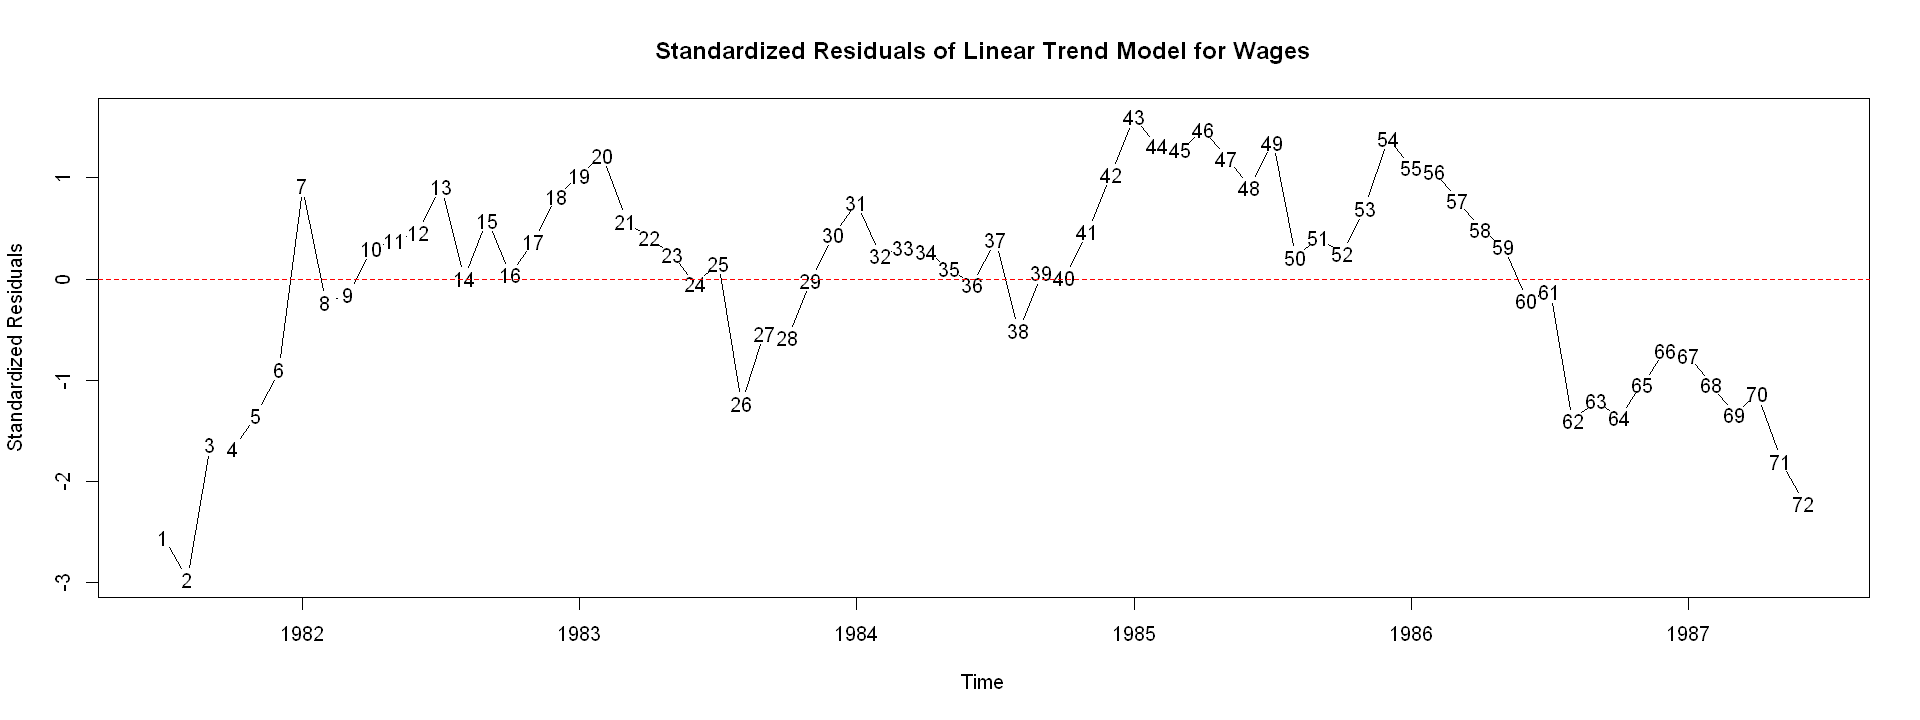

In [82]:
# Plot the sequence of standardized residuals from the linear model of wages
plot(y = linear_residuals_wages, x = time_var_wages, type = "o",
     ylab = "Standardized Residuals", xlab = "Time",
     main = "Standardized Residuals of Linear Trend Model for Wages")
abline(h = 0, col = "red", lty = 2)


d) Use least squares to fit a quadratic time trend to the wages time series. Interpret the regression output. Save the standardized residuals from the fit for further analysis.

In [71]:
# Fit the quadratic time trend model
quadratic_model_wages <- lm(wages ~ time_var_wages + I(time_var_wages^2))

# Display the summary of the model
summary(quadratic_model_wages)

# Save the standardized residuals
quadratic_residuals_wages <- rstandard(quadratic_model_wages)


Call:
lm(formula = wages ~ time_var_wages + I(time_var_wages^2))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148318 -0.041440  0.001563  0.050089  0.139839 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -8.495e+04  1.019e+04  -8.336 4.87e-12 ***
time_var_wages       8.534e+01  1.027e+01   8.309 5.44e-12 ***
I(time_var_wages^2) -2.143e-02  2.588e-03  -8.282 6.10e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05889 on 69 degrees of freedom
Multiple R-squared:  0.9864,	Adjusted R-squared:  0.986 
F-statistic:  2494 on 2 and 69 DF,  p-value: < 2.2e-16


e) Construct and interpret the time series plot of the standardized residuals from part (d).

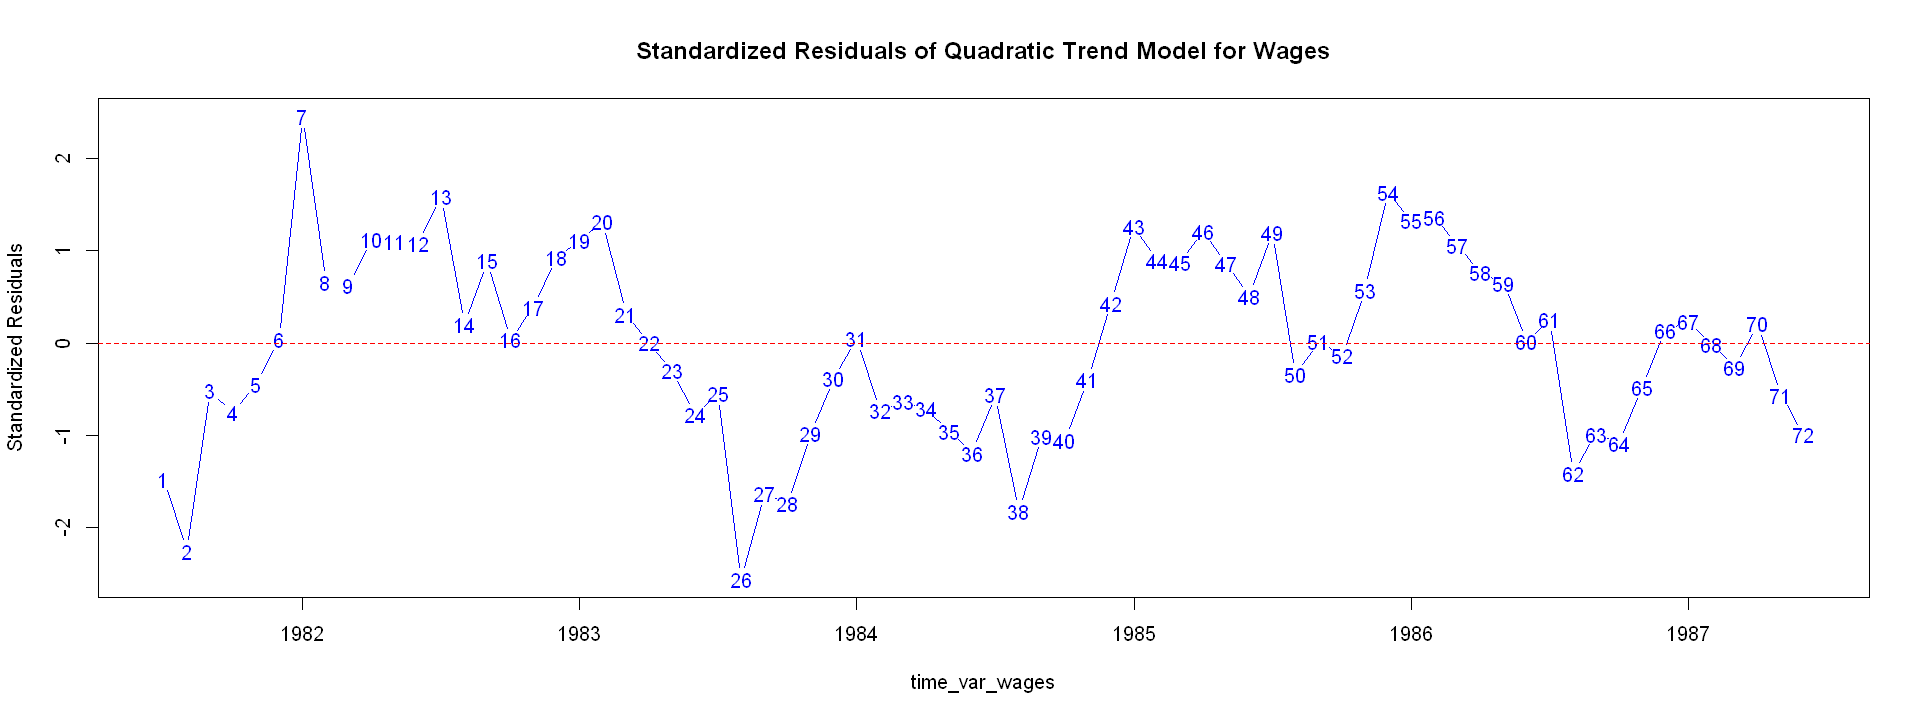

In [83]:
# Plot the sequence of standardized residuals from the quadratic model of wages
plot(y = quadratic_residuals_wages, x = time_var_wages,
     type = "o", pch = 20, col = "blue",
     ylab = "Standardized Residuals",
     main = "Standardized Residuals of Quadratic Trend Model for Wages")

# Add a horizontal line at y = 0 for reference
abline(h = 0, col = "red", lty = 2)

### 3.9

In [123]:
data(prescrip)
prescrip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,,,,,,,,14.5471,14.6721,14.8016,14.6125,14.2967
1987,14.3250,14.6231,15.1362,15.2200,15.7592,16.0724,16.1126,16.1826,16.4537,15.9885,16.1646,16.6733
1988,16.5005,16.8483,16.5935,17.4391,17.9894,17.8031,18.5141,18.8180,19.2117,18.9650,18.7972,19.1667
1989,18.9739,18.5933,19.3313,20.1503,20.9867,21.1868,21.8878,21.8578,22.4741,22.1601,21.9503,21.9989
1990,21.8922,22.2364,23.0349,23.4658,24.6513,24.7339,25.2870,25.3264,25.7877,25.1988,25.4100,25.2900
1991,24.5715,24.2925,25.4905,26.1685,27.0857,27.4766,28.2164,27.9908,28.1535,27.5391,27.9092,26.8256
1992,27.9715,29.4773,30.6624,,,,,,,,,


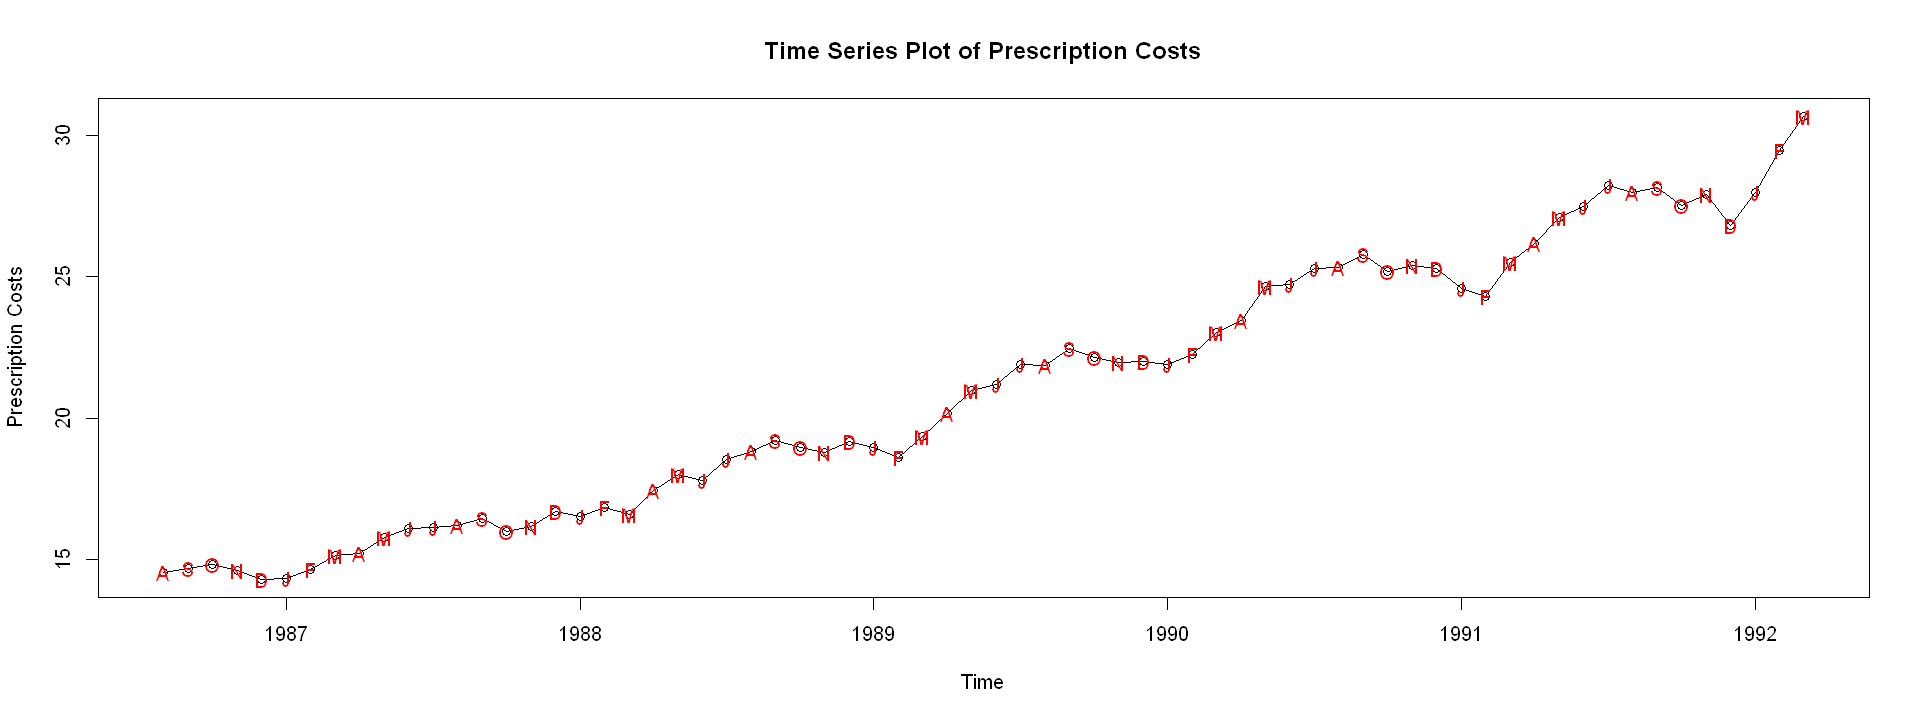

In [124]:
# Display the time series plot for prescrip data
plot(prescrip, x = as.vector(time(prescrip)), type = "o",
     xlab = "Time", ylab = "Prescription Costs",
     main = "Time Series Plot of Prescription Costs")
points(prescrip, x = as.vector(time(prescrip)), pch = as.vector(season(prescrip)), col = "red")

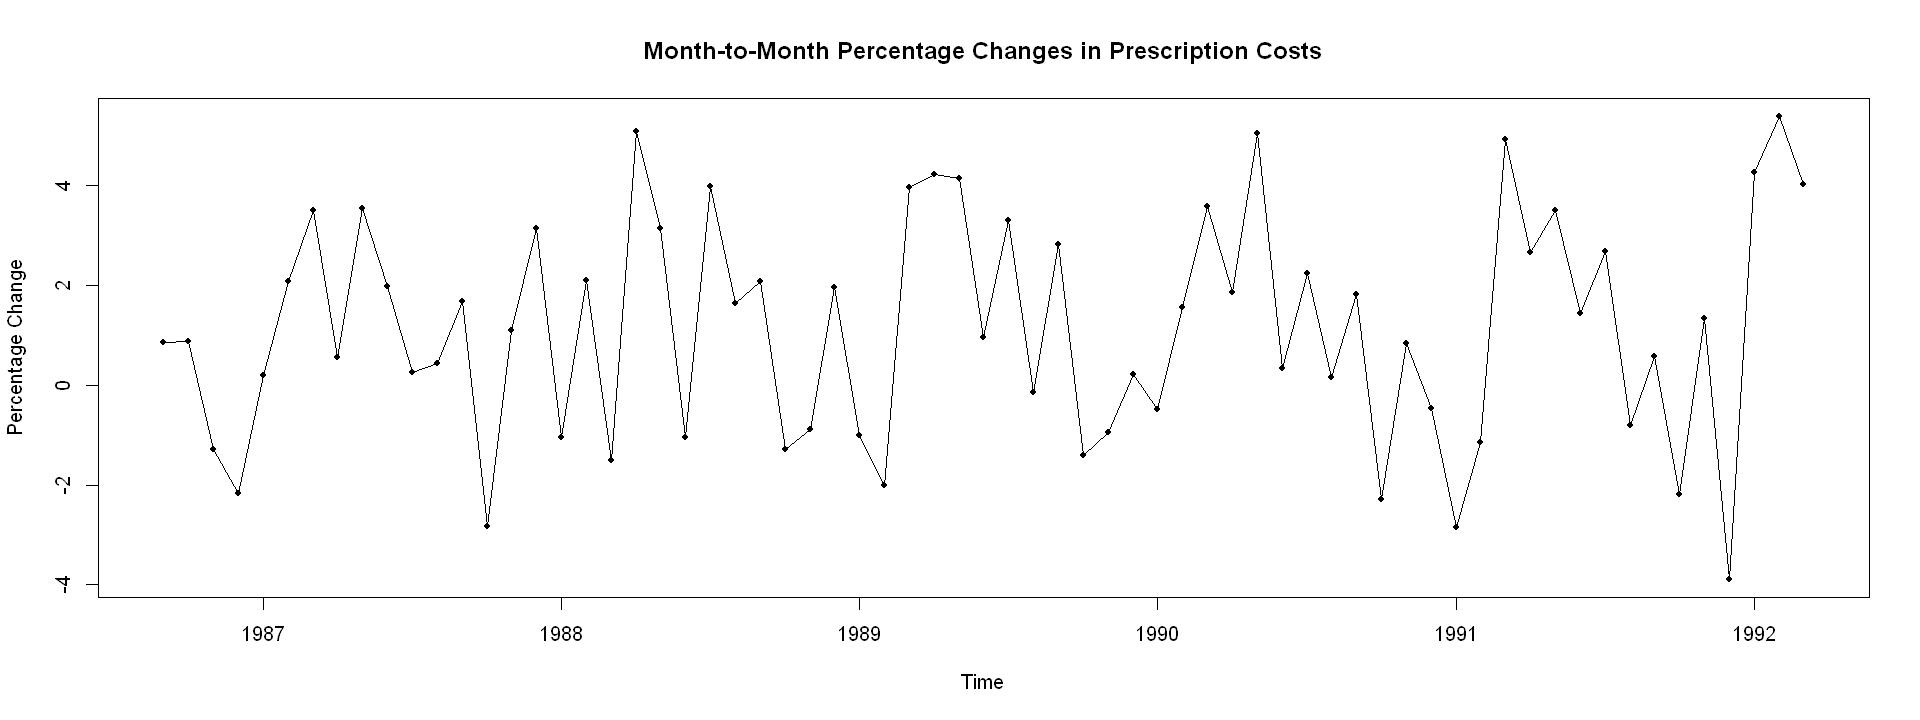

In [84]:
# Calculate month-to-month percentage changes
prescrip_pct_change <- diff(prescrip) / lag(prescrip, -1) * 100

# Plot the percentage changes
plot(prescrip_pct_change, type = "o", pch = 20,
     ylab = "Percentage Change",
     main = "Month-to-Month Percentage Changes in Prescription Costs")

In [63]:
# Define the time variable
time_var <- time(prescrip_pct_change)

# Fit the cosine trend model
cosine_model <- lm(prescrip_pct_change ~ cos(2 * pi * time_var / 12))

# Display the summary of the model
summary(cosine_model)

# Save the standardized residuals
cosine_residuals <- rstandard(cosine_model)


Call:
lm(formula = prescrip_pct_change ~ cos(2 * pi * time_var/12))

Residuals:
   Min     1Q Median     3Q    Max 
-5.183 -2.024  0.044  1.871  4.083 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.1169     0.2841   3.931 0.000208 ***
cos(2 * pi * time_var/12)   0.1837     0.4160   0.442 0.660179    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.271 on 65 degrees of freedom
Multiple R-squared:  0.002992,	Adjusted R-squared:  -0.01235 
F-statistic: 0.1951 on 1 and 65 DF,  p-value: 0.6602


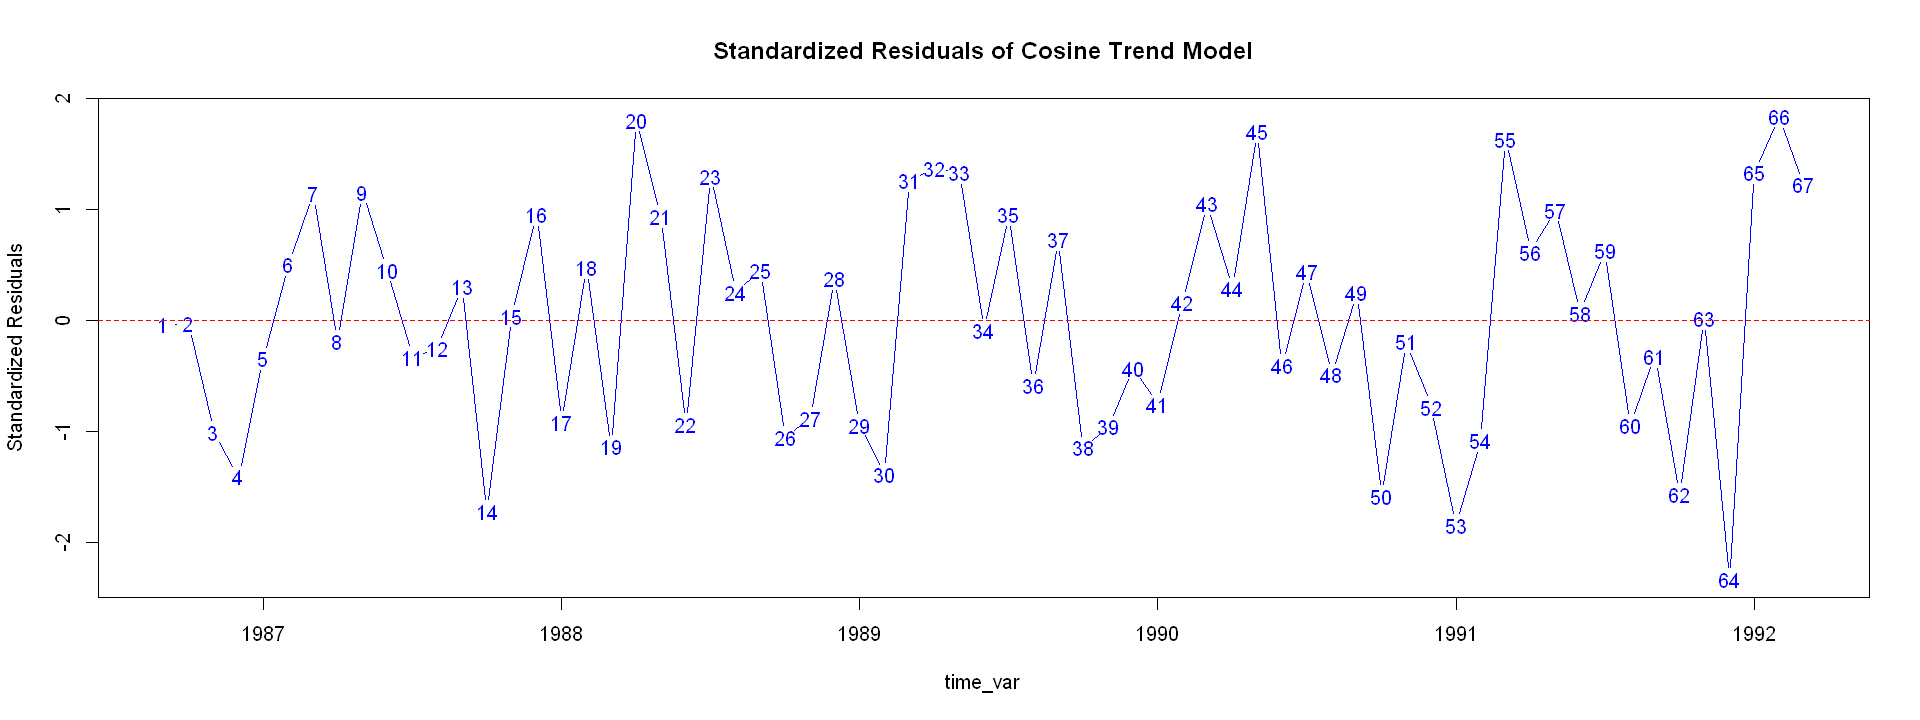

In [64]:
# Plot the sequence of standardized residuals
plot(y = cosine_residuals, x = time_var, type = "o", pch = 20, col = "blue", ylab = "Standardized Residuals", main = "Standardized Residuals of Cosine Trend Model")

# Add a horizontal line at y = 0 for reference
abline(h = 0, col = "red", lty = 2)

# 3.15

(Continuation of Exercise 3.9) Consider again the prescrip time series.

a) Save the standardized residuals from a least squares fit of a cosine trend with fundamental frequency 1/12 to the percentage change time series.

b) Perform a runs test on the standardized residuals and interpret the results.

c) Calculate and interpret the sample autocorrelations for the standardized residuals.

d) Investigate the normality of the standardized residuals (error terms). Consider histograms and normal probability plots. Interpret the plots.

a) Save the standardized residuals from a least squares fit of a cosine trend with fundamental frequency 1/12 to the percentage change time series.

In [112]:
# Fit the cosine trend model with fundamental frequency 1/12
cosine_model_1_12 <- lm(prescrip_pct_change ~ cos(2 * pi * time_var / 12))

# Save the standardized residuals
cosine_residuals_1_12 <- rstandard(cosine_model_1_12)

b) Perform a runs test on the standardized residuals and interpret the results.

In [114]:
# Load the tseries package
library(tseries)

# Convert the residuals to a factor indicating above/below median
residuals_factor <- factor(cosine_residuals_1_12 > median(cosine_residuals_1_12))

# Perform a runs test on the standardized residuals
runs_test_result <- runs.test(residuals_factor)

# Display the results of the runs test
print(runs_test_result)



	Runs Test

data:  residuals_factor
Standard Normal = -0.61383, p-value = 0.5393
alternative hypothesis: two.sided



c) Calculate and interpret the sample autocorrelations for the standardized residuals.


Autocorrelations of series 'cosine_residuals_1_12', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.080  0.099 -0.114 -0.110 -0.319 -0.324 -0.229  0.070 -0.079  0.253  0.242 
    12     13     14     15     16     17     18 
 0.312 -0.010  0.144 -0.094 -0.084 -0.248 -0.183 


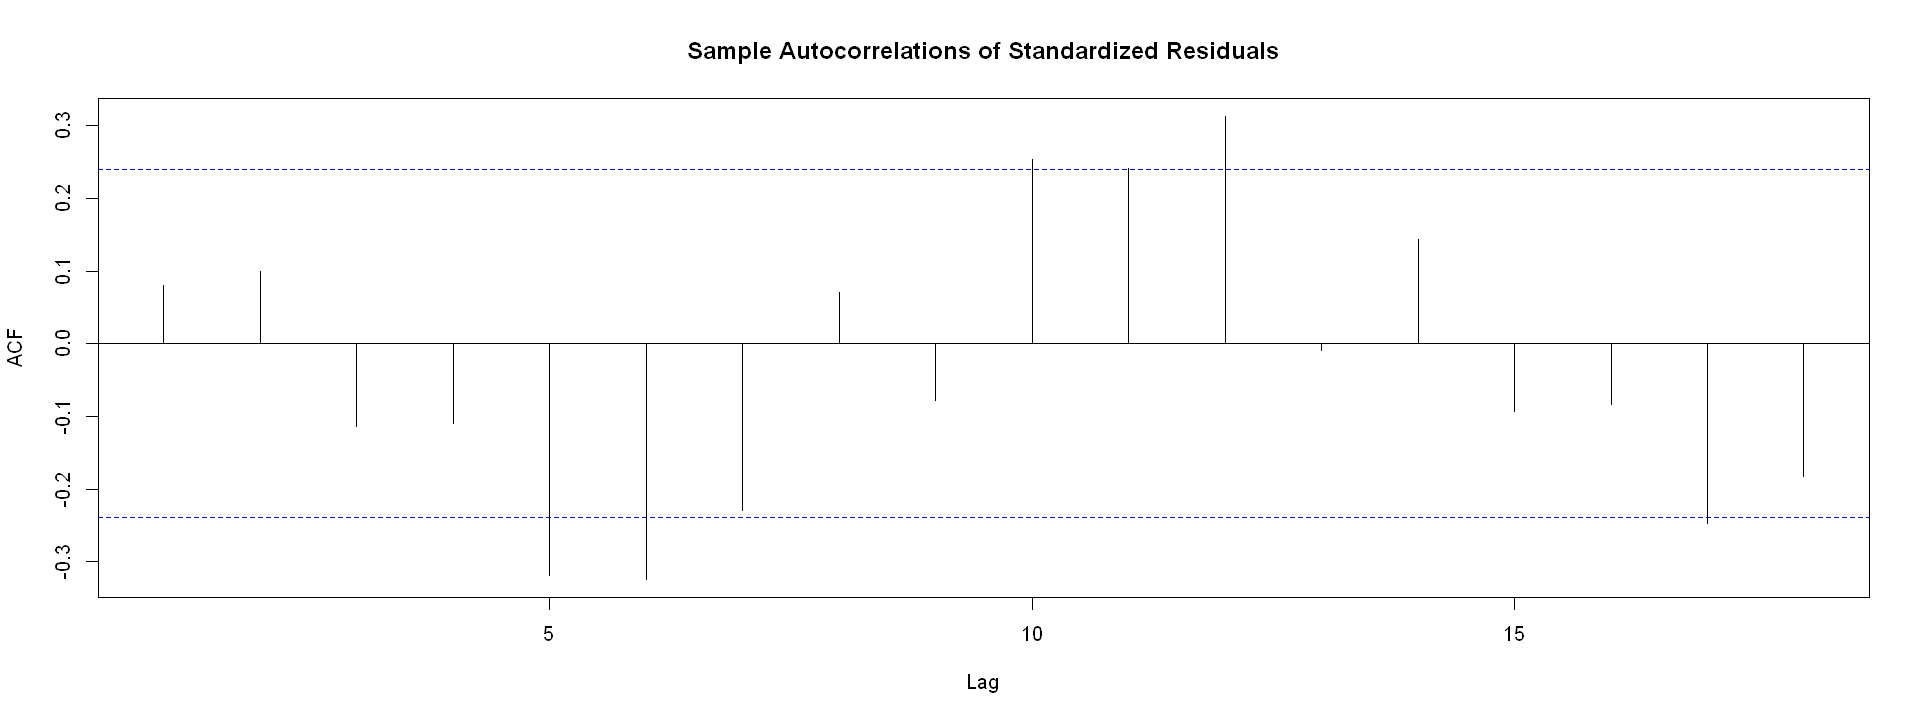

In [115]:
# Calculate the sample autocorrelations for the standardized residuals
acf_residuals <- acf(cosine_residuals_1_12, main = "Sample Autocorrelations of Standardized Residuals")

# Display the autocorrelation values
print(acf_residuals)

d) Investigate the normality of the standardized residuals (error terms). Consider histograms and normal probability plots. Interpret the plots.

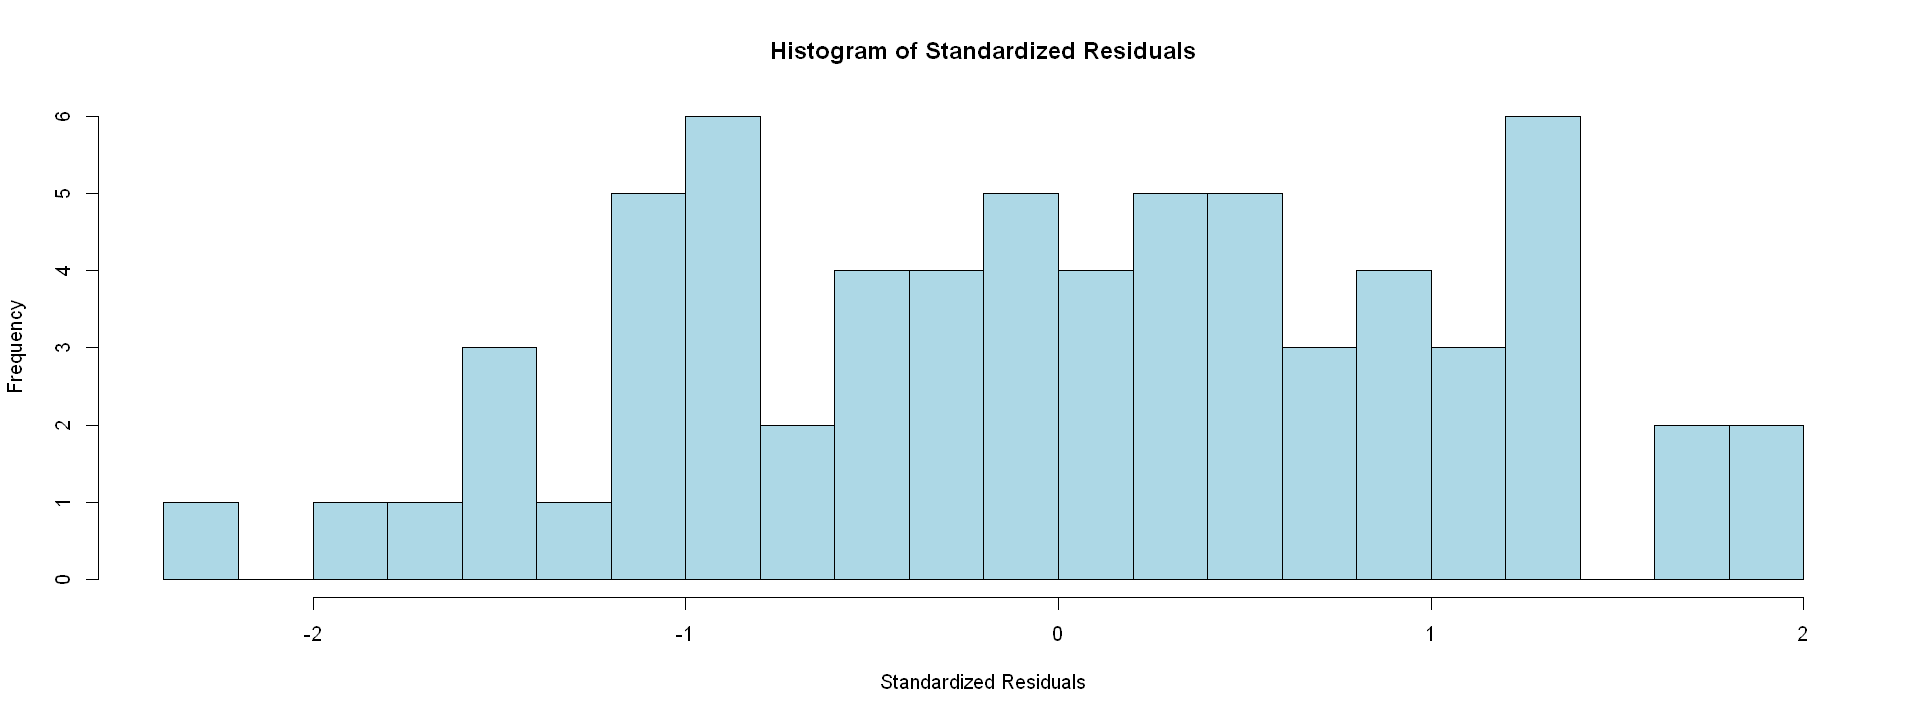

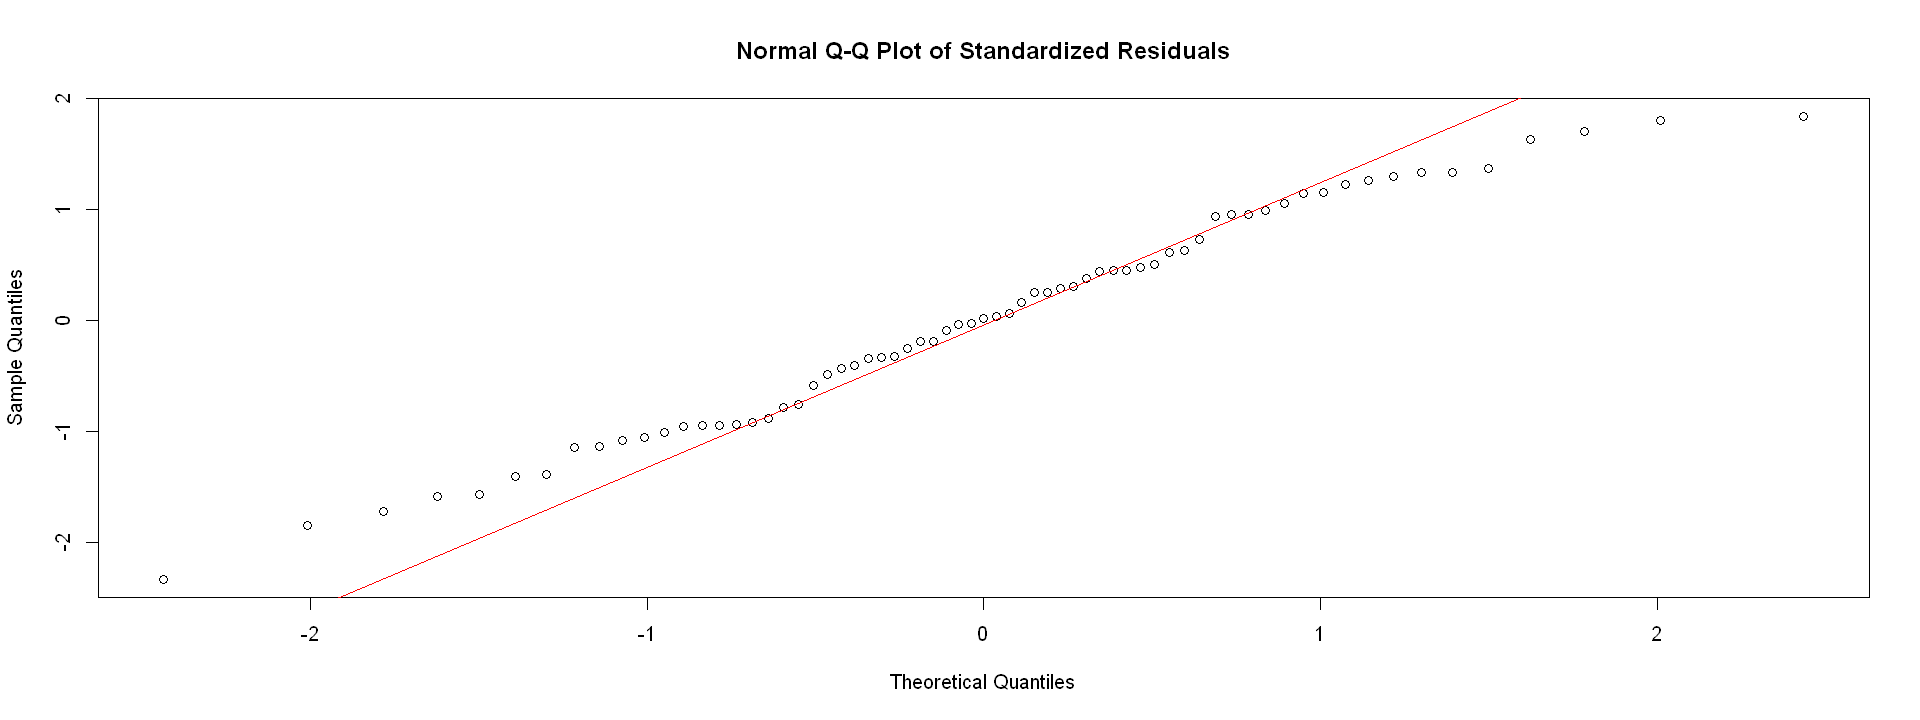

In [116]:
# Histogram of the standardized residuals
hist(cosine_residuals_1_12, breaks = 20, main = "Histogram of Standardized Residuals", xlab = "Standardized Residuals", col = "lightblue")

# Normal probability plot (Q-Q plot) of the standardized residuals
qqnorm(cosine_residuals_1_12, main = "Normal Q-Q Plot of Standardized Residuals")
qqline(cosine_residuals_1_12, col = "red")